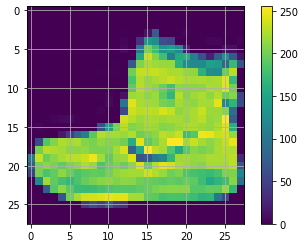

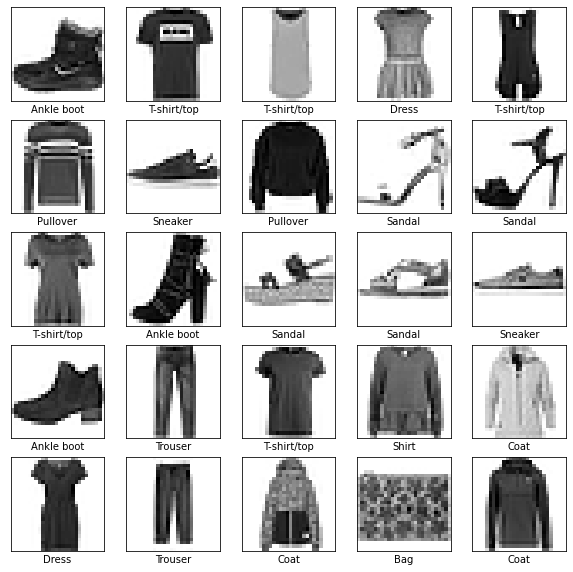

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6287 - accuracy: 0.7813
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3819 - accuracy: 0.8628
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3411 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3096 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2930 - accuracy: 0.8929
313/313 - 0s - loss: 0.3539 - accuracy: 0.8771

테스트 정확도: 0.8770999908447266


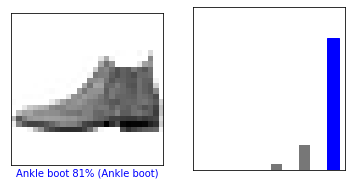

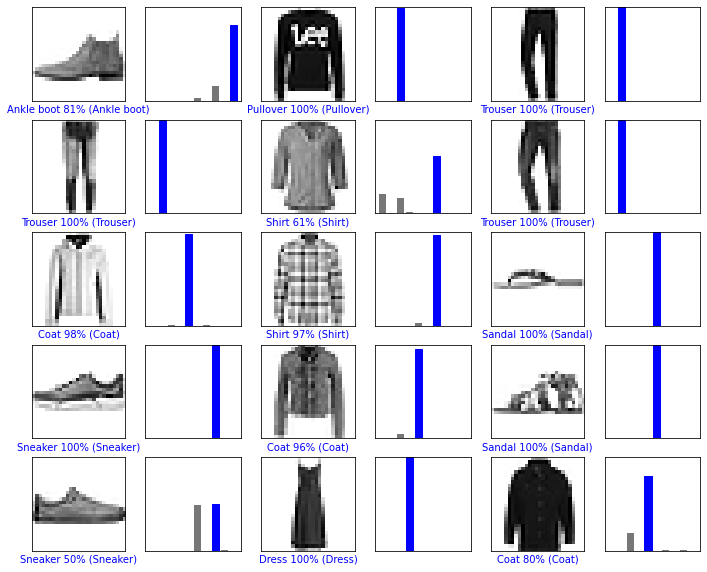

In [6]:
# 파이썬 라이브러리 임포트
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


# 패션 mnist 데이터 로드
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


# 이미지 출력시 필요한 변수 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# 데이터셋 구조 확인
train_images.shape # 60,000개의 이미지/ 28x28 픽셀
len(train_labels)  # 60,000개의 레이블
train_labels       # 레이블은 0~9 사이의 정수
test_images.shape  # 10,000개의 이미지/ 28x28 픽셀
len(test_labels)  # 10,000개의 레이블


# 데이터 전처리
plt.figure()                 # 새로운 figure 생성
plt.imshow(train_images[0])  # train_images[0]의 이미지 보여주기
plt.colorbar()               # colorbar 생성
plt.grid(False)				 # grid - 나눔표? 생성
plt.show()                   # 생성한 모든 figure 보여주기

train_images = train_images / 255.0
test_images = test_images / 255.0


# train_images 에서 첫 25개 이미지/클래스 이름 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# layer 설정 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # 2차원 배열의 이미지 포멧을 28*28 의 1차원 배열로 변환
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])
    

# 모델 컴파일 - loss function / optimizer / metrics 설정   
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 모델 훈련
model.fit(train_images, train_labels, epochs=5)


# 정확도 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)


# 예측 생성
predictions = model.predict(test_images) # 테스트 세트에 있는 각 이미지의 레이블을 예측
predictions[0]
np.argmax(predictions[0]) # 가장 높은 신뢰도를 가진 레이블 예측
test_labels[0]


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


# 10개 그래프에 대한 예측 그래프로 표현
def plot_image(i, predictions_array, true_label, img): # 그래프로 표현하는 함수
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label): #
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
# 0번째 이미지 출력 및 신뢰도 점수의 배열을 이미지로 출력
# plt.subplot - 한개의 화면에 여러 그래프 나눠 그리기
# 파랑색 - 올바른 예측
# 빨강색 - 잘못된 예측
i = 0  # 0번째 이미지 사용
plt.figure(figsize=(6,3)) # 이미지 사이즈 (6,3)
plt.subplot(1,2,1) # 121 - 1*2 로 나눈 것중 1번째 그림
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels) 
plt.show()


# 처음 X 개의 테스트 이미지, 예측 레이블, 진짜 레이블 출력
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()